In [1]:
ls

mymodel.zip  sample_data/


In [0]:
import zipfile
import zipfile
with zipfile.ZipFile('mymodel.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [6]:
ls

deploy.prototxt  mymodel/     res10_300x300_ssd_iter_140000.caffemodel
__MACOSX/        mymodel.zip  sample_data/


In [0]:
import os
os.chdir('mymodel')

In [10]:
os.getcwd()

'/content/mymodel'

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse

In [0]:
data_path = './data'

In [0]:
lst = os.listdir(data_path)
if '.DS_Store' in lst:
  lst.remove('.DS_Store')

In [0]:
data = []
labels = []

In [12]:
paths_list = list(paths.list_images(data_path))
paths_list

['./data/without_mask/376.jpg',
 './data/without_mask/154.jpg',
 './data/without_mask/169.jpg',
 './data/without_mask/306.jpg',
 './data/without_mask/341.jpg',
 './data/without_mask/392.jpg',
 './data/without_mask/20.jpg',
 './data/without_mask/360.jpg',
 './data/without_mask/163.jpg',
 './data/without_mask/augmented_image_69.jpg',
 './data/without_mask/97.jpg',
 './data/without_mask/augmented_image_290.jpg',
 './data/without_mask/augmented_image_301.jpg',
 './data/without_mask/augmented_image_138.jpg',
 './data/without_mask/208.jpg',
 './data/without_mask/augmented_image_13.jpg',
 './data/without_mask/266.jpg',
 './data/without_mask/augmented_image_111.jpg',
 './data/without_mask/91.jpg',
 './data/without_mask/398.jpg',
 './data/without_mask/365.jpg',
 './data/without_mask/augmented_image_145.jpg',
 './data/without_mask/augmented_image_183.jpg',
 './data/without_mask/augmented_image_32.jpg',
 './data/without_mask/252.jpg',
 './data/without_mask/augmented_image_3.jpg',
 './data/without

In [0]:
import cv2
for i in paths_list:
  label = i.split('/')[-2]
  image = cv2.imread(i)
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(224,224))
  data.append(image)
  labels.append(label)

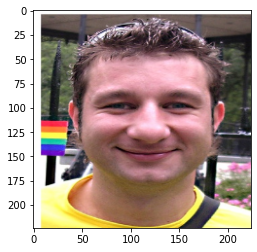

In [15]:
test_image = data[10]
plt.imshow(test_image)

In [16]:
len(data)

1376

In [17]:
len(labels)

1376

In [0]:
data = np.array(data)/255
labels = np.array(labels)

In [0]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)


In [0]:
mygen = ImageDataGenerator(rotation_range=15,
                           fill_mode="nearest",
                          )

In [21]:
mygen

In [0]:
int_lr = 1e-3
epoch = 25
bs= 32

In [0]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

In [25]:
base = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
head = base.output
head = MaxPooling2D(pool_size=(7, 7))(head)
head = Flatten(name="flatten")(head)
head = Dense(128, activation="relu")(head)
head = Dense(64, activation="relu")(head)
head = Dropout(0.5)(head)
head = Dense(2, activation="softmax")(head)

In [27]:
from tensorflow.keras.models import Model
model = Model(inputs = base.input, outputs = head)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [28]:
base.layers

In [0]:
for l in base.layers:
  l.trainable = False


In [0]:
adm = Adam(lr=int_lr, decay=int_lr / epoch)

In [0]:
model.compile(loss="binary_crossentropy", optimizer=adm,metrics=["accuracy"])

In [33]:
fit_model = model.fit_generator(mygen.flow(trainX, trainY, batch_size=bs),
                        steps_per_epoch=len(trainX) // bs,
                        validation_data=(testX, testY),
                        validation_steps=len(testX) // bs,
                        epochs=epoch) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
34/34 [==============================] - 12s 349ms/step - loss: 0.4203 - accuracy: 0.8943 - val_loss: 0.0131 - val_accuracy: 0.9928
Epoch 2/25
34/34 [==============================] - 11s 322ms/step - loss: 0.0534 - accuracy: 0.9831 - val_loss: 0.0058 - val_accuracy: 0.9964
Epoch 3/25
34/34 [==============================] - 11s 314ms/step - loss: 0.0622 - accuracy: 0.9803 - val_loss: 0.0148 - val_accuracy: 0.9964
Epoch 4/25
34/34 [==============================] - 11s 314ms/step - loss: 0.0117 - accuracy: 0.9963 - val_loss: 0.0158 - val_accuracy: 0.9891
Epoch 5/25
34/34 [==============================] - 11s 314ms/step - loss: 0.0083 - accuracy: 0.9981 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/25
34/34 [==============================] - 11s 316ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.6695e-04 - val_accuracy: 1.0000
Epoch 7/25
34/34 [==============================] - 11s 315ms/

In [50]:
predIdxs = model.predict(testX, batch_size=bs)
type(predIdxs)

numpy.ndarray

In [51]:
len(predIdxs)

276

In [0]:
model.save_weights('./')

In [0]:
model.save('facemask_detection.h5')

In [36]:
predIdxs[1]

array([1.0000000e+00, 1.2419531e-17], dtype=float32)

In [0]:
predId= np.argmax(predIdxs, axis = 1)

In [38]:
predId

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0])

In [39]:
print(classification_report(testY.argmax(axis=1), predId,
	target_names=lb.classes_))

              precision    recall  f1-score   support

   with_mask       1.00      1.00      1.00       138
without_mask       1.00      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [0]:
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(testY.argmax(axis=1), predId)

In [42]:
total = sum(sum(c_m))
acc = (c_m[0, 0] + c_m[1, 1]) / total
sensitivity = c_m[0, 0] / (c_m[0, 0] + c_m[0, 1])
specificity = c_m[1, 1] / (c_m[1, 0] + c_m[1, 1])
print(c_m)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[138   0]
 [  0 138]]
acc: 1.0000
sensitivity: 1.0000
specificity: 1.0000


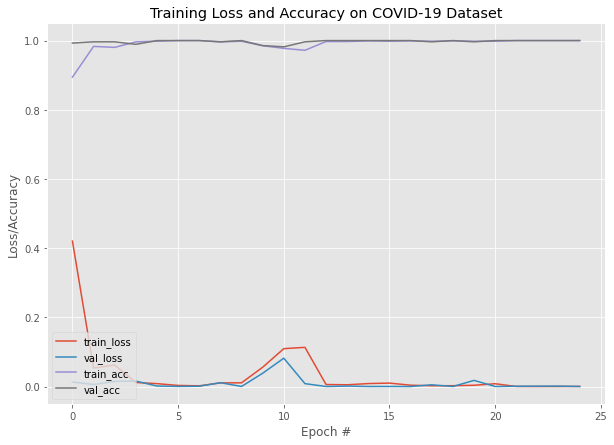

In [43]:
N = epoch
plt.style.use("ggplot")
plt.rcParams["figure.figsize"]=10,7
plt.figure()
plt.plot(np.arange(0, N), fit_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), fit_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), fit_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), fit_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("figure")

In [0]:
# Sometimes validation loss can be less than the training loss due to some factors like Regularization(eg Dropout)

In [48]:
model.save(args["model"], save_format="h5")

NameError: ignored

In [49]:
print(1)

1


In [5]:
os.getcwd()

'/content/mymodel'

In [0]:
proto_path = "/content/deploy.prototxt"
weights_path = "/content/res10_300x300_ssd_iter_140000.caffemodel"

In [13]:
weights_path

'/content/res10_300x300_ssd_iter_140000.caffemodel'

In [0]:
import cv2
net = cv2.dnn.readNet(proto_path, weights_path)

In [2]:
!pip install opencv-python==3.4.2.16

In [0]:
import cv2

In [4]:
cv2.__version__

'3.4.2'

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model = load_model('/content/facemask_detection.h5')

In [0]:
image = cv2.imread('/content/mymodel/data/with_mask/10-with-mask.jpg')

In [54]:
image.shape[:2]

(350, 233)

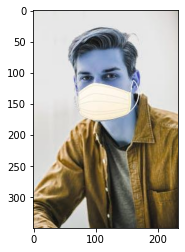

In [55]:
plt.imshow(image)

In [0]:
orig = image.copy()
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))
net.setInput(blob)
detections = net.forward()

4.1998243e-05


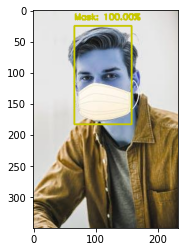

In [58]:
for i in range(detections.shape[2]):
  if detections[0,0,i,2]>0.5:
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")
      (startX, startY) = (max(0, startX), max(25, startY))
      (endX, endY) = (min(w - 1, endX), min(h - 1, endY))
      face = image[startY:endY, startX:endX]
      face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
      face = cv2.resize(face, (224, 224))
      face = img_to_array(face)
      face = preprocess_input(face)
      face = np.expand_dims(face, axis=0)
      (mask, withoutMask) = model.predict(face)[0]
      print(withoutMask)
      if mask > withoutMask:
        label = "Mask"
        color = (200,200,0)
      else:
          label = "Without Mask"
          color = (0,200,200)
      label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)
      cv2.putText(image, label, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
      cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
from google.colab.patches import cv2_imshow
plt.imshow(image)
